<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II - R4001

# TAREA SEMANAL 1

Autor: Nicolás Burgos


### ENUNCIADO

Luego de haber visto en clase las dos topologías circuitales del filtro Pasa Banda Pasivo:

![alt text](filtros_pasabanda.png)

Se propone reemplazar el Inductor del filtro de la Fig. 1 con un GIC:

![alt text](gic.png)

1. Analizar la impedancia de entrada desde el nodo $V_x$. Hallar los valores de $R_4,R_5,Y_1,Y_2$ e $Y_3$ de tal manera que responda como un Inductor de valor unitario. 

2. Obtener la función transferencia $H(s) = \frac{V2}{V1}$. Desnormalice convenientemente en frecuencia e impedancia para garantizar una **$f_0 = 10KHz$ y $Q = 20$**  utilizando Capacitores entre **1 nF y 100 nF**. Para los resistores no hay restricciones. 

3.  Simule la **transferencia desnormalizada** en Python. Se sugiere programar la **transferencia normalizada** y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en (2).

4. Observe la posibilidad ( no se pide realizar ninguna cuenta ) de conectar un GIC en el circuito de la Fig. 2  para reemplazo del Inductor. ¿Detecta algún inconveniente o limitación?

5. Graficar la respuesta de modulo en LTspice con el eje **Lineal** en frecuencia. Halle numéricamente **$BW = f_2-f_1$** y verifique que **$f_0$** es la media geométrica (MG) entre **$f_2$** y **$f_1$**.
 

### RESOLUCIÓN

#### PUNTO 1

A través del siguiente análisis del circuito planteado en el enunciado, podemos determinar las ecuaciones que nos ayudarán a determinar la impedancia de entrada en el nodo VX:

![alt text](analisis_gic.png)

\begin{equation}
I_1 = (V_x - V_y)Y_1
\end{equation}

\begin{equation}
I_2 = (V_y - V_x)Y_2 = (V_x - V_y)Y_1
\end{equation}

\begin{equation}
I_3 = \frac{V_2-V_x}{R_4} = \frac{V_x}{R_5}
\end{equation}

Despejando convenientemente, podemos obtener las siguientes expresiones:

\begin{equation}
V_2 = V_x(1+\frac{R_4}{R_5})
\end{equation}

\begin{equation}
V_y = V_x(1-\frac{Y_3 R_4}{Y_2 R_5})
\end{equation}

Por último, reemplazamos en la primera ecuación de $I_1$, obteniendo así la impedancia de entrada en el nodo $V_x$:

\begin{equation}
Z_e = Z_x = \frac{V_x}{I_1} = \frac{Y_2 Y_4}{Y_1 Y_3 Y_5} = \frac{Z_1 Z_3 Z_5}{Z_2 Z_4}
\end{equation}

Si ahora queremos que esta impedancia se comporte como un inductor de valor unitario, consideraremos $Z_2 = sC_2 = s$ y $Z_1 = Z_3 = Z_4 = Z_5 = R_i = 1$.

\begin{equation}
Z_e = Z_x = \frac{sC_2 R_1 R_3 R_5}{R_4} = sC_2 {R_i}^2 = sL_{eq} = s
\end{equation}

#### PUNTO 2:

Analizando nuevamente el circuito con del GIC, podemos ver que:

![alt text](gic.png)

\begin{equation}
V_x = \frac{V_2}{1 + \frac{R_4}{R_5}}
\end{equation}

\begin{equation}
I = I_1 + I_c = V_x \frac{R_4}{sC_2 R_1 R_3 R_5} + V_x sC = V_x \frac{s^2 C C_2 R_1 R_3 R_5 + R_4}{s C_2 R_1 R_3 R_5}
\end{equation}

De esta manera, y conociendo otra expresión análoga de $I_1$, se encuentra la siguiente función transferencia:

\begin{equation}
I = \frac{V_1 - V_x}{R}
\end{equation}

\begin{equation}
H(s) = \frac{V_2}{V_1} = \frac{s \frac{1}{CR} (1 + \frac{R_4}{R_5})}{s^2 + s \frac{1}{CR} + \frac{R_4}{C C_2 R_1 R_3 R_5}}
\end{equation}

Teniendo en cuenta las siguientes consideraciones, obtenemos:

\begin{equation}
C = C_2 = 1
\end{equation}

\begin{equation}
R_1 = R_3 = R_4 = R_5 = 1
\end{equation}

\begin{equation}
\omega_0 = 1
\end{equation}

\begin{equation}
\frac{\omega_0}{Q} = \frac{1}{CR}
\end{equation}

\begin{equation}
H(s) = \frac{s \frac{K}{Q}}{s^2 + s \frac{1}{Q} + 1}
\end{equation}

En esta última expresión, $K = 1 + \frac{R_4}{R_5} = 2$ 

Para desnormalizar la expresión vista consideramos $f_0 = 10KHz$, $Q = 20$, $C = C_2 = 10nF$. Así obtenemos las normas de impedancia y frecuencia:

\begin{equation}
\Omega_\omega = \omega_0 = 2 \pi f_0 = 62,832e^3 \frac{rad}{seg}
\end{equation}

\begin{equation}
\Omega_Z = \frac{1}{\Omega_\omega C} = 1592 \Omega
\end{equation}

Luego, los valores de los componentes quedan determinados de la siguiente manera:

\begin{equation}
C = C_2 = 10 nF
\end{equation}

\begin{equation}
R_1 = R_3 = R_4 = R_5 = \frac{1}{\Omega_\omega C} = \Omega_Z = 1592 \Omega
\end{equation}

\begin{equation}
R = \frac{Q}{\Omega_\omega C} = Q\Omega_Z = 31,840 K\Omega
\end{equation}

#### PUNTO 3:

La simulación de la **función transferencia normalizada** fue realizada con el siguiente código de Python:

<IPython.core.display.Math object>

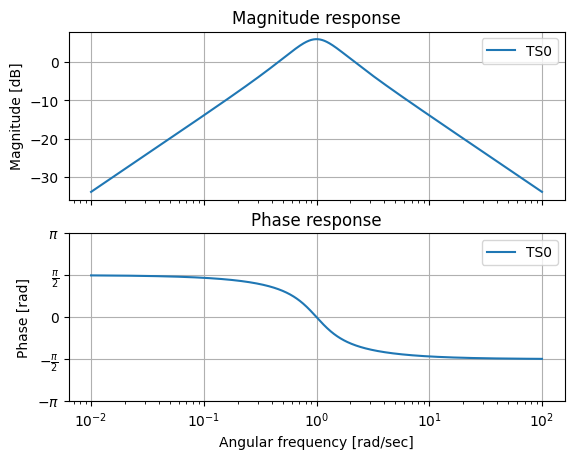

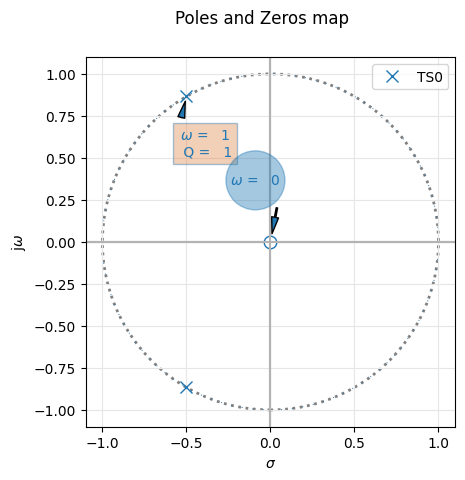

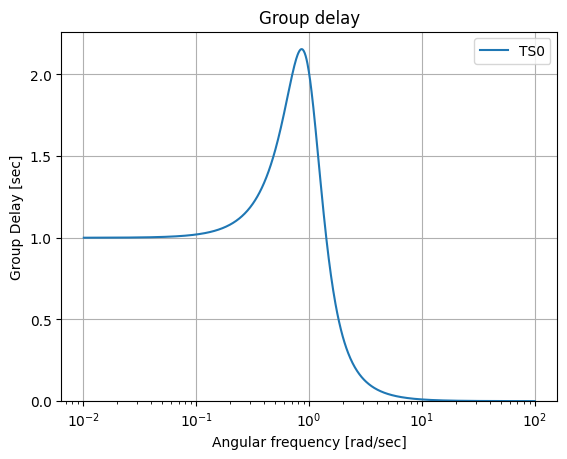

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti

fo = 1/(2*np.pi)
wo = 2*np.pi*fo
qq = 1

num = np.array([(2*wo)/qq, 0]) 
den = np.array([1, wo/qq, wo**2])

pretty_print_lti(num,den)

H1 = sig.TransferFunction(num,den)

plt.show()
plt.close('all')
analyze_sys(H1, 'TS0')

En cuanto a la **transferencia desnormalizada**, la misma fue simulada en LTSpice para poder apreciar mejor su espectro de módulo y fase. El circuito implemetado y los resultados obtenidos fueron los siguientes:

![alt text](gic_spice.png)

![alt text](gic_modulo_fase.png)

#### PUNTO 4:

En principio, no existen limitaciones al intentar reemplazar el inductor por un GIC en el segundo filtro pasa-banda visto. Solo se debe tener en cuenta que para calcular la función transferencia, no podemos tomar la tensión $V_2$ como la salida, ya que esa es la tensión entre el inductor y el capacitor del filtro. En su reemplazo, se debe tomar como salida la tensión que cae en la resistencia.

#### PUNTO 5:

Mediante la simulación en LTSpice, es posible encontrar el ancho de banda o $BW$ de este filtro pasa-banda. Esto es posible al buscar los dos valores de frecuencia existentes en el gráfico que provocan que el modulo del filtro tenga una ganancia de $-3dB$. Esos valores son los siguientes:

\begin{equation}
f_1 = 9,342KHz
\end{equation}

\begin{equation}
f_2 = 10,663KHz
\end{equation}

Luego, el ancho de banda se calcula como la diferencia entre ambos valores. Se observa a continuación el resultado arrojado por LTSpice:

\begin{equation}
BW = \Delta_f = f_2 - f_1 = 1,321KHz
\end{equation}

![alt text](gic_bw.png)

Por último, el valor de $f_0 = 10KHz$ coincide aproximadamente con la media geométrica entre los valores de frecuencia obtenidos:

\begin{equation}
MG = \sqrt{f_1*f_2} = 9,981KHz 
\end{equation}